In [1]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup  
import csv
import numpy as np
import matplotlib.pyplot as plt      
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error
import numpy as np
import seaborn as sns

In [2]:
### RandomForestRegressor() 

def load_dataset(df, label_column):
    y = df[label_column]
    X = df.drop(label_column, axis=1)
    return X, y


def data_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def normalize_data(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_model(X_train_scaled, y_train):
    forest = RandomForestRegressor(max_depth=15, min_samples_split=2 ,n_estimators=200)
    forest.fit(X_train_scaled, y_train)
    return forest

def predict_model(X_test_scaled,y_test , forest):
    y_pred = forest.predict(X_test_scaled)
    result = pd.DataFrame({'Actual': y_test, 'Predicted':  np.round(y_pred)})
    result['difference'] =  result["Actual"] -  result["Predicted"] 
    print(f"Forest Score {forest.score(X_test_scaled,y_test)}")

    return y_pred, result

 
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, r2

def tune_model(X_train_scaled, y_train):
    params = {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 200], 'min_samples_split': [2, 4, 6] }
    grid_search_cv = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1, verbose=1, cv=7)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_params = grid_search_cv.best_params_
    best_score = grid_search_cv.best_score_
    print(grid_search_cv.best_estimator_)
    return best_params, best_score

def return_best_model(X_train_scaled, X_test_scaled, y_train, y_test, best_params):
    reg = RandomForestRegressor(**best_params)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    return reg, y_pred


def Remove_outliers(df):
    for col in df.select_dtypes(include=['float64','int']).columns:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

(9851, 11)
Forest Score 0.7345713256131843
Fitting 7 folds for each of 27 candidates, totalling 189 fits
RandomForestRegressor(max_depth=10)
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.718466682560102
MAE: 504548.85379318654
R2: 0.7345713256131843


,Actual,Predicted,difference
8921,1400000.0,1379875.0,20125.0
9840,2935000.0,3645994.0,-710994.0
1851,4090000.0,3708831.0,381169.0
6334,3072000.0,2423571.0,648429.0
8517,7500000.0,8350847.0,-850847.0
...,...,...,...
3257,3900000.0,3198413.0,701587.0
111,8149000.0,7595951.0,553049.0
2884,2250000.0,2056023.0,193977.0
8775,1856000.0,1613081.0,242919.0


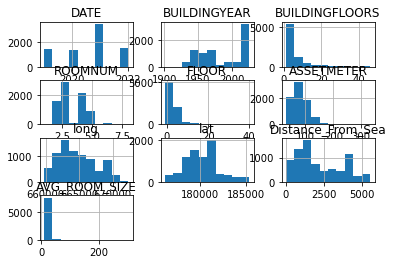

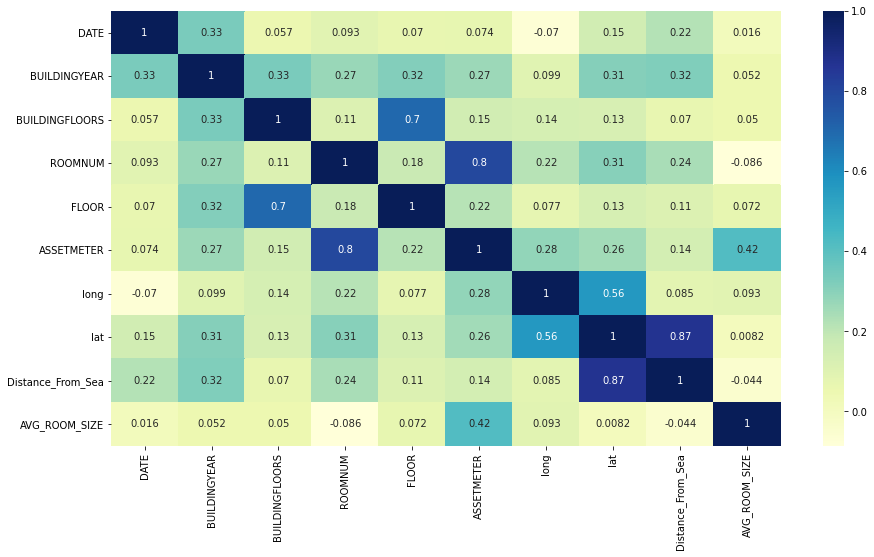

In [3]:
df = pd.read_csv("Data/Real_Estate_TLV_Numric_Data.csv",index_col=0)
df.drop(['AVG_SALARY'],axis =1 , inplace =True)
df.drop(['NEIGHBORHOOD'],axis =1 , inplace =True)

df = df[df['DATE'] >= 2019]

df['AVG_ROOM_SIZE'] = (df["ASSETMETER"] / df['ROOMNUM']).round(1)

# df = Remove_outliers(df)

print(df.shape)
label_column = "DEALAMOUNT"

X , y = load_dataset(df,label_column)
X_train, X_test, y_train, y_test = data_split(X, y)


#2. Normalize Data
X_train_scaled, X_test_scaled = normalize_data(X_train, X_test)

#3. Train Model
forest = train_model(X_train_scaled, y_train)

#4. Predict Model
y_pred , result = predict_model(X_test_scaled,y_test, forest)

#5. Evaluate Model
mae, r2 = evaluate_model(y_test, y_pred)

#6. Tune Model
best_params, best_score = tune_model(X_train_scaled, y_train)

#7. Return Best Model
forest, y_pred = return_best_model(X_train_scaled, X_test_scaled, y_train, y_test, best_params)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("MAE:", mae) # mae = mean_absolute_error
print("R2:", r2)
X_train.hist()
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(), annot =True ,cmap ='YlGnBu')
result

In [5]:
yad2_df = pd.read_csv("Data/Real_Estate_TLV_YAD2_Numeric.csv",index_col=0)
yad2_df.drop(['neighborhood'],axis =1 , inplace =True)
yad2_df['year'] = 2022

In [6]:

def rename_yad2_df(df):
    df.rename(columns={'price':'DEALAMOUNT'}, inplace=True)
#     df.rename(columns={'neighborhood':'NEIGHBORHOOD'}, inplace=True)
    df.rename(columns={'buildingMR':'ASSETMETER'}, inplace=True)
    df.rename(columns={'TotalFloors':'BUILDINGFLOORS'}, inplace=True)
    df.rename(columns={'floor':'FLOOR'}, inplace=True)
    df.rename(columns={'buildyear':'BUILDINGYEAR'}, inplace=True)
    df.rename(columns={'year':'DATE'}, inplace=True)
    df.rename(columns={'rooms':'ROOMNUM'}, inplace=True)
#     df = df.reindex(columns=["DATE", "DEALAMOUNT", "BUILDINGYEAR", "BUILDINGYEAR", "BUILDINGFLOORS",
#                               "NEIGHBORHOOD", "ROOMNUM", "FLOOR", "ASSETMETER", "long", "lat", "Distance_From_Sea"])
    return df

def preprocess_dataframe(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df.drop(['parking', 'balconies','shelter','on_pillars','storeroom','asset_classification','elevator','home_number'], axis=1 , inplace=True )
#     df['AVG_ROOM_SIZE'] = (df["buildingMR"] / df['rooms']).round(1)
    df = rename_yad2_df(df)
    
    df['BUILDINGFLOORS'] = df['BUILDINGFLOORS'].astype(int)

    
    
    # Remove columns with only one unique value
#     unique_counts = df.nunique()
#     cols_to_drop = unique_counts[unique_counts == 1].index
#     df = df.drop(cols_to_drop, axis=1)

    # Remove outliers
    for col in df.select_dtypes(include=['float64','int']).columns:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


def recommend_affordable_apartments(df, model):
    # Normalize the data
    X, y = load_dataset(df, "DEALAMOUNT")
    
    # We dont need the the second params so we will call it '_'
    X_scaled, _ = normalize_data(X, X)
    
    
    # Predict prices using the trained model
    y_pred = model.predict(X_scaled)
    y_pred = y_pred * 1.28 # 0.22 % is the percentage of increase in the last year (2022)
    df["PREDICTED_PRICE"] = y_pred
    df["PREDICTED_PRICE"] = df["PREDICTED_PRICE"].astype(int)
    df['difference'] =  df["DEALAMOUNT"] -  df["PREDICTED_PRICE"] 
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'r2_score: {r2} , mae: {mae}')

    return df.sort_values(by="difference")

yad2_df = preprocess_dataframe(yad2_df)
yad2_df = yad2_df.reindex(columns=["DATE", "DEALAMOUNT", "BUILDINGYEAR", "BUILDINGFLOORS",
                               "ROOMNUM", "FLOOR", "ASSETMETER", "long", "lat", "Distance_From_Sea"]) #"NEIGHBORHOOD",

yad2_df = yad2_df[np.isfinite(yad2_df["ASSETMETER"] / yad2_df['ROOMNUM'])]
yad2_df['AVG_ROOM_SIZE'] = (yad2_df["ASSETMETER"] / yad2_df['ROOMNUM']).round(1)
yad2_df['AVG_ROOM_SIZE'] = yad2_df['AVG_ROOM_SIZE'].astype(int)

affordable_deals = recommend_affordable_apartments(yad2_df, forest)
affordable_deals

r2_score: 0.7215137785402587 , mae: 964875.3647220962


,DATE,DEALAMOUNT,BUILDINGYEAR,BUILDINGFLOORS,ROOMNUM,FLOOR,ASSETMETER,long,lat,Distance_From_Sea,AVG_ROOM_SIZE,PREDICTED_PRICE,difference
55,2022,7250000,1973,7,7,7,340,660684.0,178078.0,1873,48,12754191,-5504191
58,2022,1400000,2015,5,2,2,60,664691.0,178234.0,511,30,4661195,-3261195
141,2022,1000000,1976,3,3,2,60,663247.0,178206.0,1032,20,4049117,-3049117
266,2022,2250000,1950,3,3,3,95,664963.0,178567.0,771,31,5282034,-3032034
11,2022,9690000,2021,4,6,0,234,666556.0,180214.0,1955,39,12551370,-2861370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2022,20000000,2015,5,8,4,230,664698.0,178392.0,681,28,15297516,4702484
218,2022,9800000,1995,2,4,1,90,666210.0,179312.0,1105,22,4813707,4986293
12,2022,14900000,2022,6,5,6,172,666237.0,178669.0,395,34,9350332,5549668
9,2022,16000000,2022,4,4,4,194,663540.0,178218.0,934,48,9620865,6379135


In [7]:
# affordable_deals = recommend_affordable_apartments(yad2_df, forest)
# affordable_deals

In [23]:
affordable_deals.sort_values(by="difference",  ascending=True )

affordable_deals = affordable_deals.reindex(columns=["DATE", "DEALAMOUNT",'PREDICTED_PRICE','difference', "BUILDINGYEAR", "BUILDINGFLOORS",
                               "ROOMNUM", "FLOOR", "ASSETMETER", "long", "lat", "Distance_From_Sea"])
#NEIGHBORHOOD
affordable_deals[0:130]
affordable_deals.shape

(232, 12)

### 

In [71]:
yad2_origin = pd.read_csv("Data/Real_Estate_TLV_YAD2.csv",index_col=0)

def covert_data(df):
    df = df.dropna()
    df.loc[:, 'price'] = df['price'].str.replace('[^0-9]','',regex=True).astype(int)
    df.loc[:, 'buildingMR'] = df['buildingMR'].astype(int)
    df.loc[:, 'floor'] = df['floor'].astype(int)

    
    df.rename(columns={'price':'DEALAMOUNT'}, inplace=True)
    df.rename(columns={'buildingMR':'ASSETMETER'}, inplace=True)
    df.rename(columns={'floor':'FLOOR'}, inplace=True)
    return df

yad2_origin = covert_data(yad2_origin)
yad2_origin.shape


C:\Users\yoavl\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\yoavl\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(286, 19)

In [72]:
def merge_dataframes(df1, df2):
    new_df = df1.merge(df2, on=['ASSETMETER', 'DEALAMOUNT','FLOOR'], how='right')
    new_df = new_df.drop(['TotalFloors','home_number_2','ROOMNUM'], axis=1)
    new_df = new_df.dropna()
    return new_df

yad2_all = merge_dataframes(yad2_origin,affordable_deals)
yad2_all.shape

(238, 25)

In [76]:
yad2_all = yad2_all.reindex(columns=["DATE", "DEALAMOUNT", 'PREDICTED_PRICE', 'difference','long_y','lat_y','lat_x', 'long_x'
                                    , 'street', 'neighborhood'
                                    , 'BUILDINGYEAR', 'BUILDINGFLOORS','home_number', 'item_id',
                                     'ASSETMETER', 'TotalFloors', 'asset_classification', 'rooms', 'FLOOR',
                                       'shelter', 'on_pillars', 'elevator', 'storeroom','parking', "Distance_From_Sea"])

yad2_all.sort_values(by="difference",  ascending=True )

,DATE,DEALAMOUNT,PREDICTED_PRICE,difference,long_y,lat_y,lat_x,long_x,street,neighborhood,...,TotalFloors,asset_classification,rooms,FLOOR,shelter,on_pillars,elevator,storeroom,parking,Distance_From_Sea
0,2022,7250000,12754191,-5504191,660684.0,178078.0,32.038674,34.766435,"זלמן שז""ר","נווה עופר, תל כביר",...,NaN,3,7,7,1,0,1,1,NaN,1873
1,2022,1400000,4661195,-3261195,664691.0,178234.0,32.074816,34.767913,בן יהודה,"לב תל אביב, לב העיר צפון",...,NaN,3,2,2,0,0,1,0,NaN,511
2,2022,1000000,4049117,-3049117,663247.0,178206.0,32.061798,34.767678,לילינבלום,נווה צדק,...,NaN,5,3,2,0,0,0,0,NaN,1032
3,2022,2250000,5282034,-3032034,664963.0,178567.0,32.077284,34.771434,לוריא,הצפון הישן - דרום,...,NaN,3,3,3,0,0,0,0,NaN,771
4,2022,9690000,12551370,-2861370,666556.0,180214.0,32.091706,34.788809,"ד""ר בודנהיימר",הצפון החדש - צפון,...,NaN,1,6,0,1,0,0,1,NaN,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2022,20000000,15297516,4702484,664698.0,178392.0,32.074888,34.769591,חברון,"לב תל אביב, לב העיר צפון",...,NaN,6,8,4,1,0,1,1,NaN,681
234,2022,9800000,4813707,4986293,666210.0,179312.0,32.088553,34.779271,ז'בוטינסקי,הצפון הישן - צפון,...,NaN,6,4,1,1,0,1,1,NaN,1105
235,2022,14900000,9350332,5549668,666237.0,178669.0,32.088771,34.772455,זלטופולסקי,הצפון הישן - צפון,...,NaN,1,5,6,1,1,1,1,NaN,395
236,2022,16000000,9620865,6379135,663540.0,178218.0,32.064440,34.767795,יצחק אלחנן,נווה צדק,...,NaN,1,4,4,0,0,0,0,NaN,934
